<a href="https://colab.research.google.com/github/sebasvp2005/CC216--TP-2024-1/blob/main/code/upc_pre_2401_2_tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [ ]:
install.packages('dplyr')
install.packages("ggplot2")
install.packages("countrycode")
install.packages("reshape2")
library(dplyr)
library(ggplot2)
library(countrycode)
library(reshape2)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#Carga de datos

In [591]:
#cargar la data
hotel_csv = read.csv('hotel.csv', header = TRUE,  stringsAsFactors = FALSE, na.strings = "NULL" )

In [592]:
str(hotel_csv)

'data.frame':	119390 obs. of  32 variables:
 $ hotel                         : chr  "Resort Hotel" "Resort Hotel" "Resort Hotel" "Resort Hotel" ...
 $ is_canceled                   : int  0 0 0 0 0 0 0 0 1 1 ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : chr  "July" "July" "July" "July" ...
 $ arrival_date_week_number      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : chr  "0" "0" "0" "0" ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : chr  "BB" "BB" "BB" "BB" ...
 $ country                     

In [593]:
summary(hotel_csv)

    hotel            is_canceled       lead_time   arrival_date_year
 Length:119390      Min.   :0.0000   Min.   :  0   Min.   :2015     
 Class :character   1st Qu.:0.0000   1st Qu.: 18   1st Qu.:2016     
 Mode  :character   Median :0.0000   Median : 69   Median :2016     
                    Mean   :0.3704   Mean   :104   Mean   :2016     
                    3rd Qu.:1.0000   3rd Qu.:160   3rd Qu.:2017     
                    Max.   :1.0000   Max.   :737   Max.   :2017     
                                                                    
 arrival_date_month arrival_date_week_number arrival_date_day_of_month
 Length:119390      Min.   : 1.00            Min.   : 1.0             
 Class :character   1st Qu.:16.00            1st Qu.: 8.0             
 Mode  :character   Median :28.00            Median :16.0             
                    Mean   :27.17            Mean   :15.8             
                    3rd Qu.:38.00            3rd Qu.:23.0             
                    Ma

In [594]:
names = names(hotel_csv)
names

[1] "hotel"                          "is_canceled"                   
 [3] "lead_time"                      "arrival_date_year"             
 [5] "arrival_date_month"             "arrival_date_week_number"      
 [7] "arrival_date_day_of_month"      "stays_in_weekend_nights"       
 [9] "stays_in_week_nights"           "adults"                        
[11] "children"                       "babies"                        
[13] "meal"                           "country"                       
[15] "market_segment"                 "distribution_channel"          
[17] "is_repeated_guest"              "previous_cancellations"        
[19] "previous_bookings_not_canceled" "reserved_room_type"            
[21] "assigned_room_type"             "booking_changes"               
[23] "deposit_type"                   "agent"                         
[25] "company"                        "days_in_waiting_list"          
[27] "customer_type"                  "adr"                           
[29] "required_car_parking_spaces"    "total_of_special_requests"     
[31] "reservation_status"             "reservation_status_date"

In [595]:
head(hotel_csv)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,No Deposit,NA,NA,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,No Deposit,NA,NA,0,Transient,0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,No Deposit,NA,NA,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,No Deposit,304,NA,0,Transient,75,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NA,0,Transient,98,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NA,0,Transient,98,0,1,Check-Out,2015-07-03


In [596]:
names = names(hotel_csv)

#Exploracion de la Data


In [597]:
count_bad_data =0

In [598]:
hotel_csv = hotel_csv%>% select(hotel, is_canceled, adr, adults, children, babies, arrival_date_month, arrival_date_week_number,  arrival_date_year, country, stays_in_weekend_nights, stays_in_week_nights, market_segment, reservation_status_date, required_car_parking_spaces)

In [599]:
hotel_csv$hotel = as.factor(hotel_csv$hotel)
hotel_csv$is_canceled = as.logical(hotel_csv$is_canceled)
hotel_csv$adults = as.integer(hotel_csv$adults)
hotel_csv$children = as.integer(hotel_csv$children)
hotel_csv$babies = as.integer(hotel_csv$babies)
hotel_csv$arrival_date_month = as.factor(hotel_csv$arrival_date_month)
hotel_csv$arrival_date_week_number = as.factor(hotel_csv$arrival_date_week_number)
hotel_csv$arrival_date_year = as.integer(hotel_csv$arrival_date_year)
hotel_csv$country = as.factor(hotel_csv$country)
hotel_csv$stays_in_weekend_nights = as.integer(hotel_csv$stays_in_weekend_nights)
hotel_csv$market_segment = as.factor(hotel_csv$market_segment)
hotel_csv$reservation_status_date = as.Date(hotel_csv$reservation_status_date)
hotel_csv$required_car_parking_spaces = as.integer(hotel_csv$required_car_parking_spaces)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [600]:
str(hotel_csv)

'data.frame':	119390 obs. of  15 variables:
 $ hotel                      : Factor w/ 2 levels "City Hotel","Resort Hotel": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ adr                        : num  0 0 75 75 98 ...
 $ adults                     : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ arrival_date_month         : Factor w/ 12 levels "April","August",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ arrival_date_week_number   : Factor w/ 53 levels "1","2","3","4",..: 27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_year          : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ country                    : Factor w/ 177 levels "ABW","AGO","AIA",..: 136 136 60 60 60 60 136 136 136 136 ...
 $ stays_in_weekend_nights    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights       : int  0 0 1 1 2 2 2 2 3 3 ...
 $ mar

In [601]:
# Frecuencia de variables null por columna

checkNaPerColumn = function(df){
    table = data.frame(
        ColumnName = character(),
        Count = integer(),
        stringsAsFactors = FALSE
    )

    for (col in names(df)) {
        count <- sum(sapply(df[col], function(x) is.na(x)))
        table[nrow(table)+1,] = c(col, count)
    }
    table$Count = as.integer(table$Count)

    return(table)
}

checkUniquePerColimn = function(df){
    for (col in names(df)){
        print(col)
        uni = sort(unique(df[[col]]))
        print(uni)
    }
}


In [602]:
naTable = checkNaPerColumn(hotel_csv)
naTable

,ColumnName,Count
,<chr>,<int>
1,hotel,0
2,is_canceled,0
3,adr,0
4,adults,0
5,children,4
6,babies,0
7,arrival_date_month,0
8,arrival_date_week_number,0
9,arrival_date_year,0


In [603]:
naCount = sum(naTable$Count)
totalCount = nrow(hotel_csv) * ncol(hotel_csv)

In [604]:
count_bad_data = count_bad_data + naCount

In [605]:
naCount

[1] 492

In [606]:
totalCount

[1] 1790850

In [607]:
cat("El porcentaje de valores nulos es: ", naCount/totalCount * 100, "%")

El porcentaje de valores nulos es:  0.02747299 %

In [608]:
checkUniquePerColimn(hotel_csv)

[1] "hotel"
[1] City Hotel   Resort Hotel
Levels: City Hotel Resort Hotel
[1] "is_canceled"
[1] FALSE  TRUE
[1] "adr"
   [1]   -6.38    0.00    0.26    0.50    1.00    1.29    1.48    1.56    1.60
  [10]    1.80    2.00    2.40    3.00    3.38    4.00    4.50    5.00    5.20
  [19]    5.25    6.00    6.40    6.50    6.67    6.90    7.00    7.80    8.00
  [28]    8.34    8.43    9.00    9.14    9.67    9.71   10.00   10.50   10.80
  [37]   11.53   11.75   12.00   12.50   13.00   14.00   15.00   16.00   16.92
  [46]   17.50   17.60   18.00   18.50   18.60   19.00   19.09   19.15   19.35
  [55]   20.00   20.88   21.00   21.37   21.50   22.00   22.11   22.40   22.50
  [64]   22.86   23.00   23.50   23.60   23.70   23.93   24.00   24.50   24.70
  [73]   24.79   24.80   24.83   24.87   24.94   24.95   25.00   25.11   25.42
  [82]   25.50   25.64   25.65   25.92   26.00   26.10   26.23   26.26   26.33
  [91]   26.35   26.50   26.64   26.93   26.95   26.99   27.00   27.07   27.35
 [100]   27.3

#Limpiar valores nulos

In [609]:
#Procesos de limpieza de valores nulos

Mode = function(x) {
    x = na.omit(x)
    ux <- unique(x)
    return (ux[which.max(tabulate(match(x, ux)))])
}

ReplaceWithMedian = function(df, column){
    if (is.numeric(df[[column]]) || is.logical(df[[column]])) {
        df[[column]][is.na(df[[column]])] <- median(df[[column]], na.rm=TRUE)
    }
    else{
        df[[column]][is.na(df[[column]])] = Mode(df[[column]])
    }
    return(df)
}

ReplaceWithMedianColumns = function (df, columns){
    for(i in 1:length(columns)){
        df = ReplaceWithMedian(df, columns[i])
    }
    return(df)
}

In [610]:
hotel_csv = ReplaceWithMedianColumns(hotel_csv, names(hotel_csv))

In [611]:
checkNaPerColumn(hotel_csv)

,ColumnName,Count
,<chr>,<int>
1,hotel,0
2,is_canceled,0
3,adr,0
4,adults,0
5,children,0
6,babies,0
7,arrival_date_month,0
8,arrival_date_week_number,0
9,arrival_date_year,0


In [612]:
str(hotel_csv)

'data.frame':	119390 obs. of  15 variables:
 $ hotel                      : Factor w/ 2 levels "City Hotel","Resort Hotel": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                : num  0 0 0 0 0 0 0 0 1 1 ...
 $ adr                        : num  0 0 75 75 98 ...
 $ adults                     : num  2 2 1 1 2 2 2 2 2 2 ...
 $ children                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ arrival_date_month         : Factor w/ 12 levels "April","August",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ arrival_date_week_number   : Factor w/ 53 levels "1","2","3","4",..: 27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_year          : num  2015 2015 2015 2015 2015 ...
 $ country                    : Factor w/ 177 levels "ABW","AGO","AIA",..: 136 136 60 60 60 60 136 136 136 136 ...
 $ stays_in_weekend_nights    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights       : num  0 0 1 1 2 2 2 2 3 3 ...
 $ market_segment             : Factor w/ 8 leve

In [613]:
hotel_csv$hotel = as.factor(hotel_csv$hotel)
hotel_csv$is_canceled = as.logical(hotel_csv$is_canceled)
hotel_csv$adults = as.integer(hotel_csv$adults)
hotel_csv$children = as.integer(hotel_csv$children)
hotel_csv$babies = as.integer(hotel_csv$babies)
hotel_csv$arrival_date_month = as.factor(hotel_csv$arrival_date_month)
hotel_csv$arrival_date_year = as.integer(hotel_csv$arrival_date_year)
hotel_csv$country = as.factor(hotel_csv$country)
hotel_csv$stays_in_weekend_nights = as.integer(hotel_csv$stays_in_weekend_nights)
hotel_csv$market_segment = as.factor(hotel_csv$market_segment)
hotel_csv$reservation_status_date = as.Date(hotel_csv$reservation_status_date)
hotel_csv$required_car_parking_spaces = as.integer(hotel_csv$required_car_parking_spaces)

In [614]:
str(hotel_csv)

'data.frame':	119390 obs. of  15 variables:
 $ hotel                      : Factor w/ 2 levels "City Hotel","Resort Hotel": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ adr                        : num  0 0 75 75 98 ...
 $ adults                     : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ arrival_date_month         : Factor w/ 12 levels "April","August",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ arrival_date_week_number   : Factor w/ 53 levels "1","2","3","4",..: 27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_year          : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ country                    : Factor w/ 177 levels "ABW","AGO","AIA",..: 136 136 60 60 60 60 136 136 136 136 ...
 $ stays_in_weekend_nights    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights       : num  0 0 1 1 2 2 2 2 3 3 ...
 $ mar

#Correccion de la Data

In [615]:
unique(countrycode(hotel_csv$country, "iso3c","country.name"))

Warning message:
“Some values were not matched unambiguously: CN, TMP
”


[1] "Portugal"                                  
  [2] "United Kingdom"                            
  [3] "United States"                             
  [4] "Spain"                                     
  [5] "Ireland"                                   
  [6] "France"                                    
  [7] "Romania"                                   
  [8] "Norway"                                    
  [9] "Oman"                                      
 [10] "Argentina"                                 
 [11] "Poland"                                    
 [12] "Germany"                                   
 [13] "Belgium"                                   
 [14] "Switzerland"                               
 [15] NA                                          
 [16] "Greece"                                    
 [17] "Italy"                                     
 [18] "Netherlands"                               
 [19] "Denmark"                                   
 [20] "Russia"                                    
 [21] "Sweden"                                    
 [22] "Australia"                                 
 [23] "Estonia"                                   
 [24] "Czechia"                                   
 [25] "Brazil"                                    
 [26] "Finland"                                   
 [27] "Mozambique"                                
 [28] "Botswana"                                  
 [29] "Luxembourg"                                
 [30] "Slovenia"                                  
 [31] "Albania"                                   
 [32] "India"                                     
 [33] "China"                                     
 [34] "Mexico"                                    
 [35] "Morocco"                                   
 [36] "Ukraine"                                   
 [37] "San Marino"                                
 [38] "Latvia"                                    
 [39] "Puerto Rico"                               
 [40] "Serbia"                                    
 [41] "Chile"                                     
 [42] "Austria"                                   
 [43] "Belarus"                                   
 [44] "Lithuania"                                 
 [45] "Turkey"                                    
 [46] "South Africa"                              
 [47] "Angola"                                    
 [48] "Israel"                                    
 [49] "Cayman Islands"                            
 [50] "Zambia"                                    
 [51] "Cape Verde"                                
 [52] "Zimbabwe"                                  
 [53] "Algeria"                                   
 [54] "South Korea"                               
 [55] "Costa Rica"                                
 [56] "Hungary"                                   
 [57] "United Arab Emirates"                      
 [58] "Tunisia"                                   
 [59] "Jamaica"                                   
 [60] "Croatia"                                   
 [61] "Hong Kong SAR China"                       
 [62] "Iran"                                      
 [63] "Georgia"                                   
 [64] "Andorra"                                   
 [65] "Gibraltar"                                 
 [66] "Uruguay"                                   
 [67] "Jersey"                                    
 [68] "Central African Republic"                  
 [69] "Cyprus"                                    
 [70] "Colombia"                                  
 [71] "Guernsey"                                  
 [72] "Kuwait"                                    
 [73] "Nigeria"                                   
 [74] "Maldives"                                  
 [75] "Venezuela"                                 
 [76] "Slovakia"                                  
 [77] "Fiji"                                      
 [78] "Kazakhstan"                                
 [79] "Pakistan"        

In [616]:
bad_countries = nrow(hotel_csv%>%filter(country == "CN" | country=="TMP"))

In [617]:
count_bad_data = count_bad_data + bad_countries

In [618]:
count_bad_data = count_bad_data + nrow(hotel_csv%>%filter(adults==0  | adr<=0))

In [619]:
hotel_csv = hotel_csv%>%filter(adults!=0  & adr>0)

In [620]:
hotel_csv = hotel_csv%>%filter(country!="CN" & country!="TMP")

#Limpiar Valores Atipicos

In [621]:
temp <- hotel_csv

In [622]:
summary(temp)

          hotel       is_canceled          adr              adults     
 City Hotel  :77303   Mode :logical   Min.   :   0.26   Min.   :1.000  
 Resort Hotel:38601   FALSE:72230     1st Qu.:  70.40   1st Qu.:2.000  
                      TRUE :43674     Median :  95.00   Median :2.000  
                                      Mean   : 103.52   Mean   :1.864  
                                      3rd Qu.: 126.00   3rd Qu.:2.000  
                                      Max.   :5400.00   Max.   :4.000  
                                                                       
    children          babies         arrival_date_month
 Min.   : 0.000   Min.   : 0.00000   August :13520     
 1st Qu.: 0.000   1st Qu.: 0.00000   July   :12195     
 Median : 0.000   Median : 0.00000   May    :11411     
 Mean   : 0.101   Mean   : 0.00786   April  :10875     
 3rd Qu.: 0.000   3rd Qu.: 0.00000   October:10813     
 Max.   :10.000   Max.   :10.00000   June   :10656     
                                

In [623]:
remove_atypical_values <- function(df, column_name) {

  q1 <- quantile(df[[column_name]], 0.25)
  q3 <- quantile(df[[column_name]], 0.75)

  iqr <- q3 - q1

  upper_bound <- q3 + 1.5 * iqr
  lower_bound <- q1 - 1.5 * iqr
  caps = quantile(df[[column_name]], probs = c(.05, .95), na.rm = TRUE)

  count_bad_data <<- count_bad_data + nrow(df %>% filter(df[[column_name]] > upper_bound | df[[column_name]] < lower_bound))

  df[[column_name]][df[[column_name]]>upper_bound]  = caps[2]
  df[[column_name]][df[[column_name]]<lower_bound]  = caps[1]

  return(df)
}


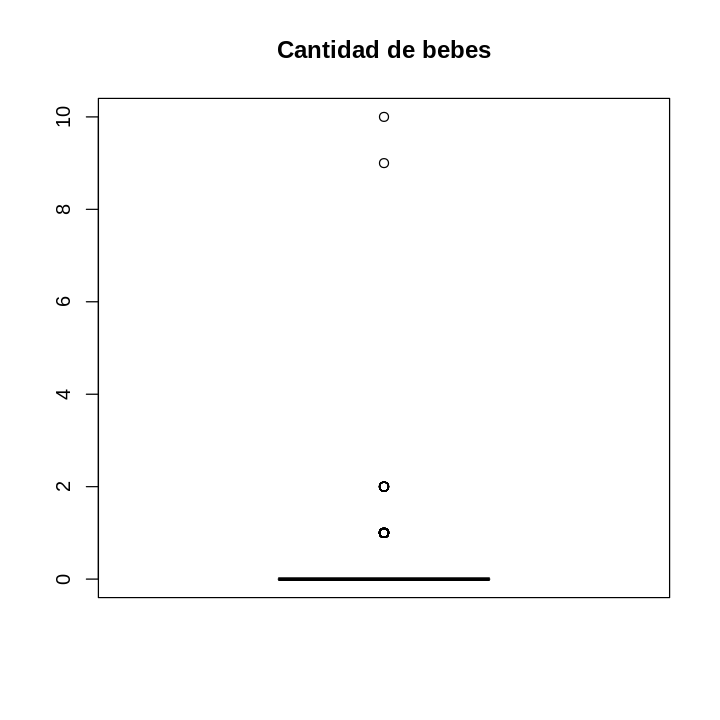

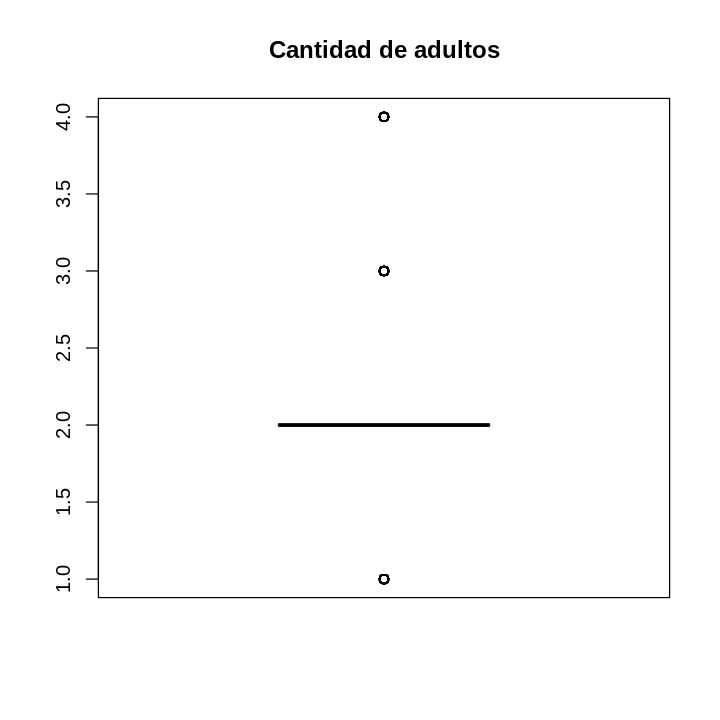

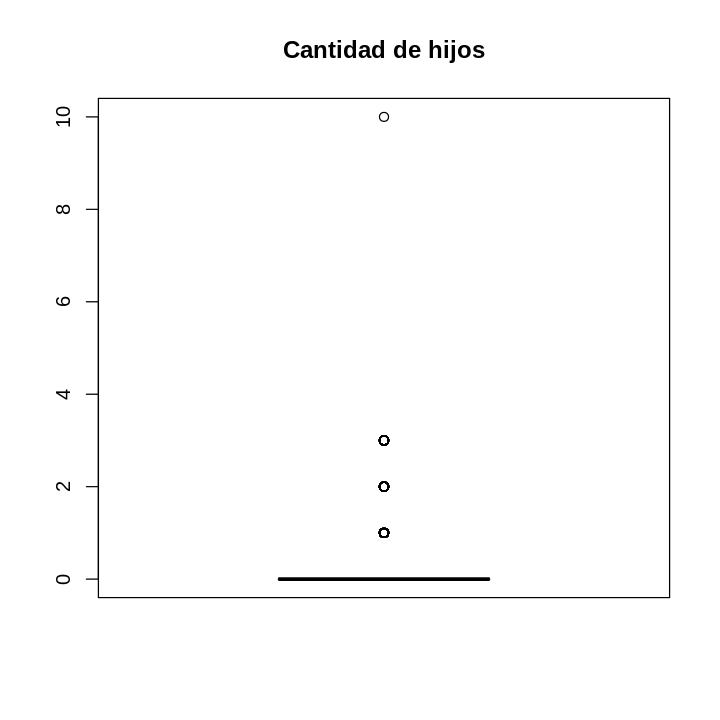

In [624]:
options(repr.plot.width = 6, repr.plot.height = 6)
boxplot(temp$babies, main="Cantidad de bebes")
boxplot(temp$adults, main= "Cantidad de adultos")
boxplot(temp$children, main= "Cantidad de hijos")

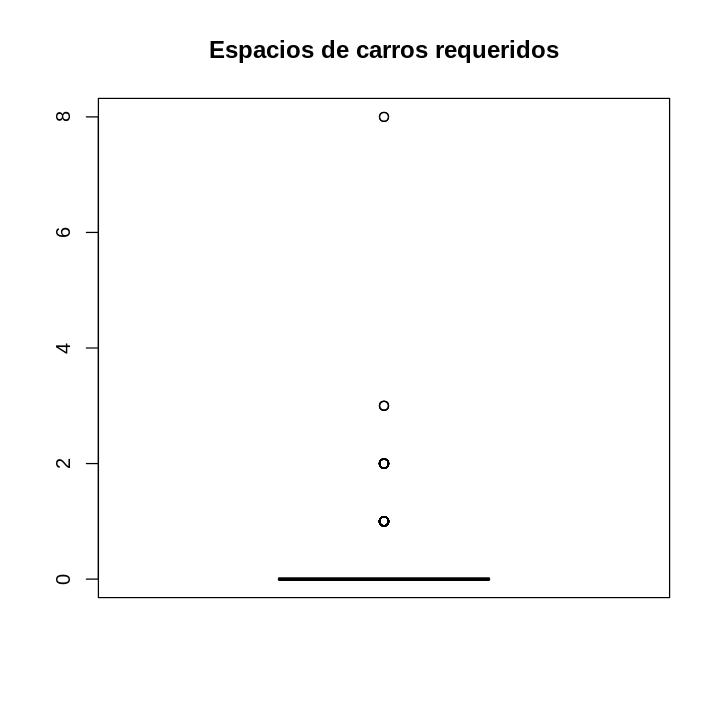

In [625]:
boxplot(temp$required_car_parking_spaces, main= "Espacios de carros requeridos")

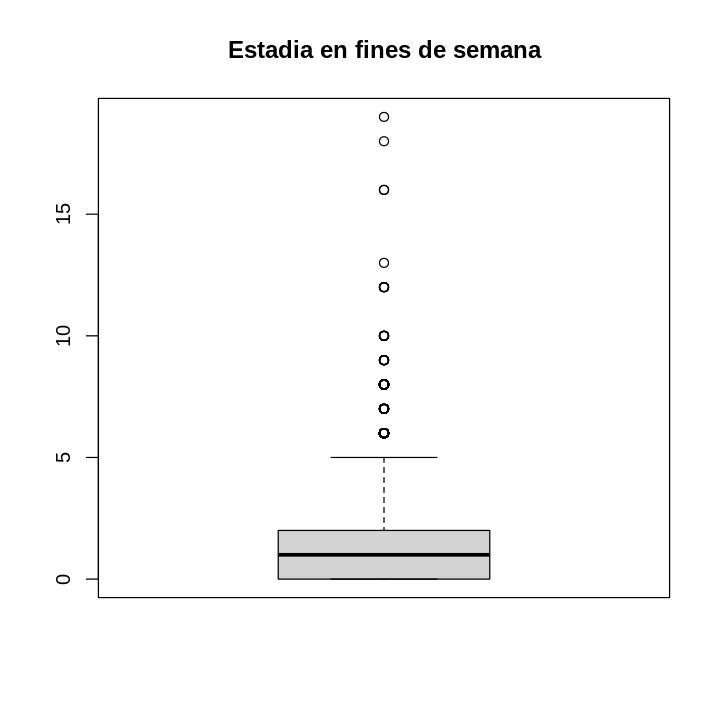

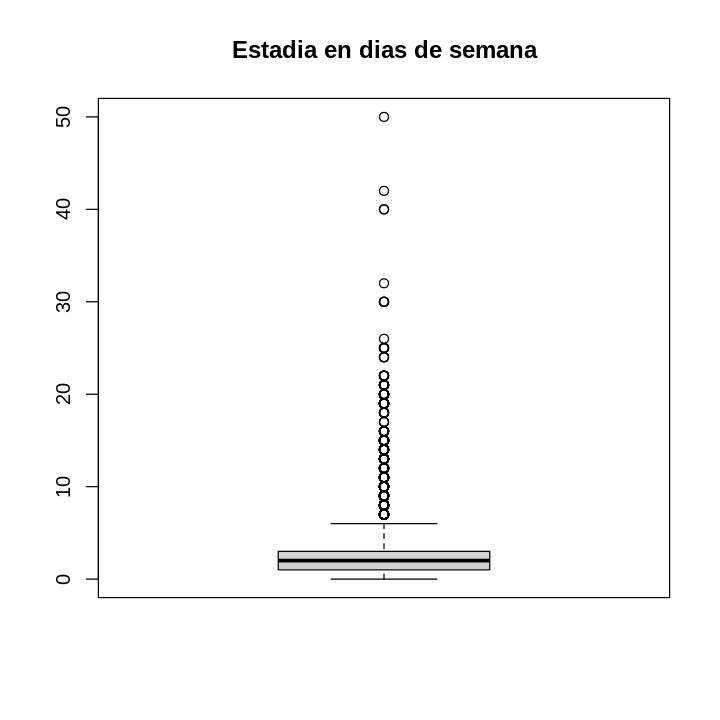

In [626]:
boxplot(temp$stays_in_weekend_nights, main= "Estadia en fines de semana")
boxplot(temp$stays_in_week_nights, main= "Estadia en dias de semana")

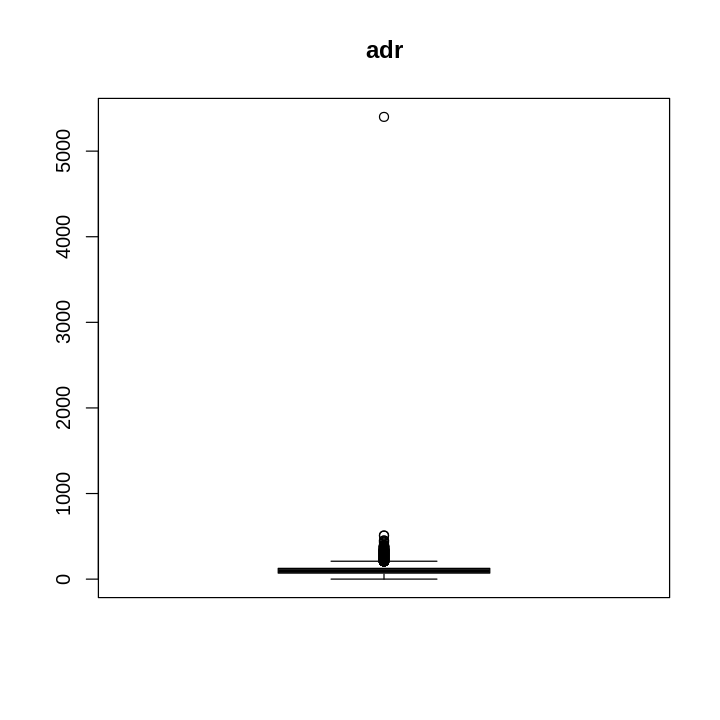

In [627]:
boxplot(temp$adr, main= "adr")

In [628]:
count_bad_data = count_bad_data + nrow(temp%>%filter(children>=10))
count_bad_data = count_bad_data + nrow(temp%>%filter(babies>=9))
count_bad_data = count_bad_data + nrow(temp%>%filter(required_car_parking_spaces>=8))
count_bad_data = count_bad_data + nrow(temp%>%filter(adults>8))
temp = temp%>% filter(children<10 & babies<9 & required_car_parking_spaces<8 & adults <= 4)

In [629]:
temp = remove_atypical_values(temp, "stays_in_weekend_nights")
temp = remove_atypical_values(temp, "stays_in_week_nights")
temp = remove_atypical_values(temp, "adr")

#Data Final

In [630]:
count_bad_data

[1] 11439

In [631]:
cat("Porcentaje de data sucia: " , count_bad_data / totalCount  * 100, "%")

Porcentaje de data sucia:  0.638747 %

In [632]:
str(hotel_csv)

'data.frame':	115904 obs. of  15 variables:
 $ hotel                      : Factor w/ 2 levels "City Hotel","Resort Hotel": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ adr                        : num  75 75 98 98 107 ...
 $ adults                     : int  1 1 2 2 2 2 2 2 2 2 ...
 $ children                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ arrival_date_month         : Factor w/ 12 levels "April","August",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ arrival_date_week_number   : Factor w/ 53 levels "1","2","3","4",..: 27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_year          : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ country                    : Factor w/ 177 levels "ABW","AGO","AIA",..: 60 60 60 60 136 136 136 136 136 136 ...
 $ stays_in_weekend_nights    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights       : num  1 1 2 2 2 2 3 3 4 4 ...
 $ 

In [633]:
hotel_csv = temp

In [634]:
write.csv(hotel_csv, file = "clean_hotel.csv", row.names = FALSE)

#Preguntas Planteadas

#### 1. ¿Cuántas reservas se realizan por el tipo de hotel o qué tipo de hotel prefiere la gente?

#####Separacion de datos

[1] 86833

[1] 54134

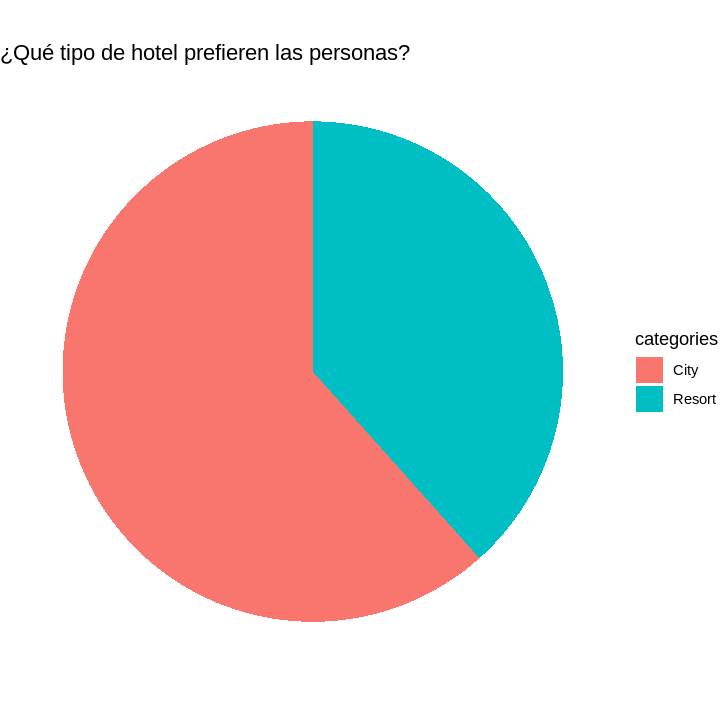

In [569]:
city = temp%>%filter(hotel == 'City Hotel' & !is_canceled)
resort = temp%>%filter(hotel != 'City Hotel' & !is_canceled)

cityCountGuest = sum(city$adults) + sum(city$children) + sum(city$babies)
cityCountGuest

resortCountGuest = sum(resort$adults) + sum(resort$children) + sum(resort$babies)
resortCountGuest


categories <- c('City', 'Resort')
values <- c(cityCountGuest, resortCountGuest)
data <- data.frame(categories, values)



ggplot(data, aes(x = "", y = values, fill = categories)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  labs(title = "¿Qué tipo de hotel prefieren las personas?")


#####Conclusiones

A traves del procesamiento de datos podemos visualizar una gran demanda respecto a los hoteles de ciudad.

#### 2. ¿Cuál es la proporción de reservas por segmento del mercado?

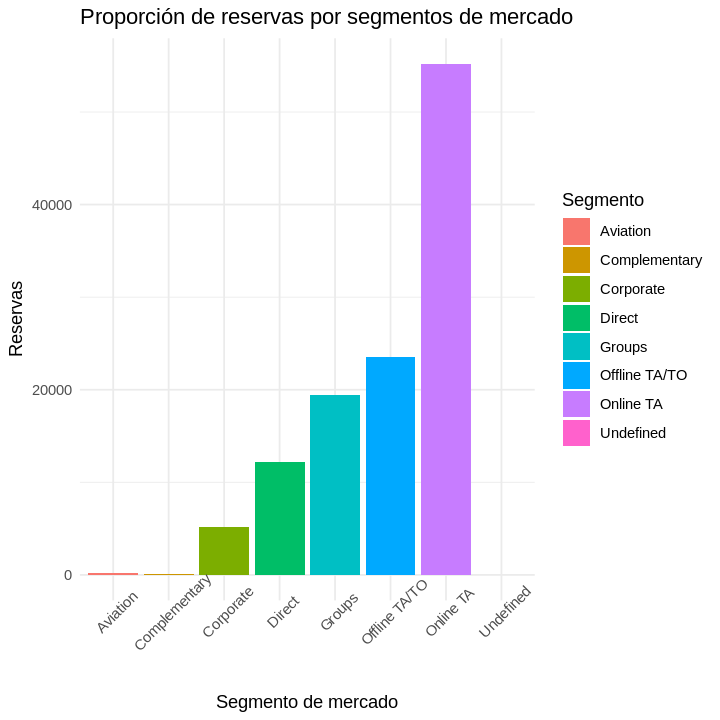

In [570]:
market_count <- hotel_csv %>%
  group_by(market_segment) %>%
  summarize(cnt_val = n())

ggplot(market_count, aes(x = market_segment, y = cnt_val, fill = market_segment)) +
  geom_bar(stat = "identity") + # Añadir 'position = "dodge"'
  labs(title = "Proporción de reservas por segmentos de mercado",
       x = "Segmento de mercado",
       y = "Reservas",
       fill = "Segmento") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45))

##### Conclusiones

Del grafico podemos deducr que casi la mitad del mercado es ocupado por el semento Online TA

#### 3. ¿Está aumentando la demanda con el tiempo?

In [572]:

reservations <- hotel_csv %>%
  group_by(arrival_date_month, arrival_date_year) %>%
  summarize(amount = n())

colnames(reservations)[1] = 'month';
colnames(reservations)[2] = 'year';

reservations <- reservations %>%
  mutate(month_date = mdy(paste0(month, " 1 2023")))

reservations <- reservations %>%
  arrange(month_date)

reservations <- reservations %>%
  select(-month_date)

reservations$month <- factor(reservations$month, levels = unique(reservations$month))

View(reservations)

years <- reservations %>%
  group_by(year) %>%
  summarize(val = mean(amount))

View(years)


`summarise()` has grouped output by 'arrival_date_month'. You can override
using the `.groups` argument.


month,year,amount
<fct>,<int>,<int>
January,2016,2163
January,2017,3598
February,2016,3794
February,2017,4076
March,2016,4702
March,2017,4814
April,2016,5317
April,2017,5558
May,2016,5310


year,val
<int>,<dbl>
2015,3543.833
2016,4593.000
2017,4940.000


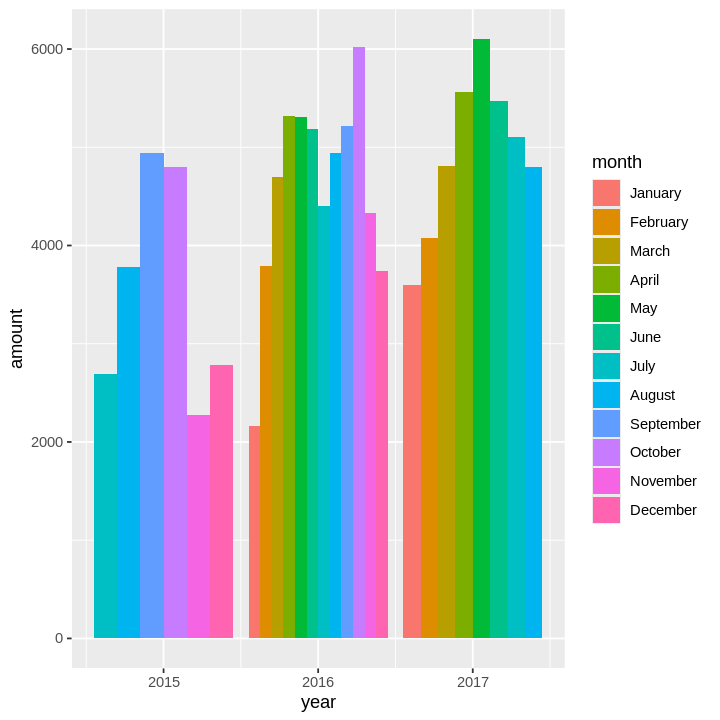

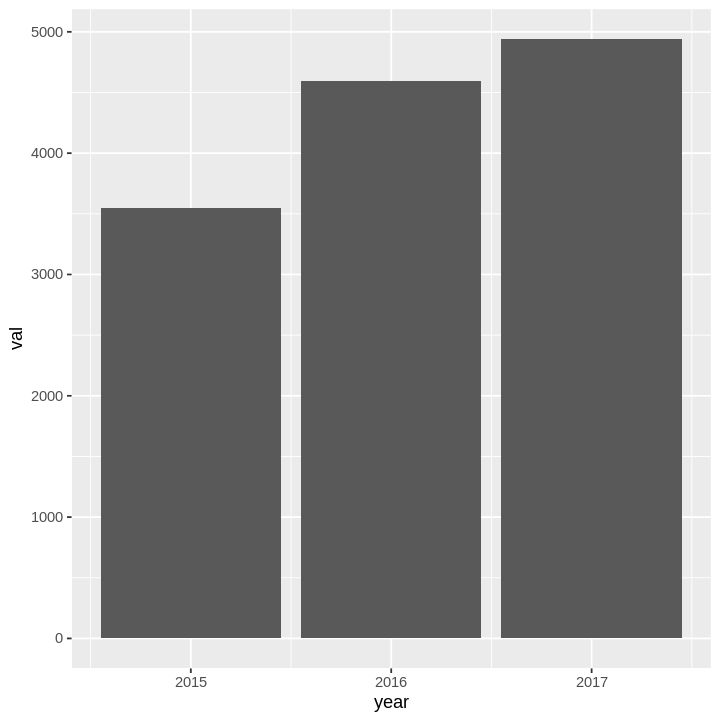

In [573]:
ggplot(reservations, aes(fill=month, y=amount, x=year)) +
  geom_bar(position="dodge", stat="identity")

ggplot(years, aes(y=val, x=year)) +
  geom_bar(position="dodge", stat="identity")

##### Conclusiones

Gracias al analisis de datos podemos observar que, ha pesar de su inestabilidad, la demanda se ha dado al alza durante en los ultmos años.

#### 4. ¿Cuántas reservas incluyen niños y/o bebés?








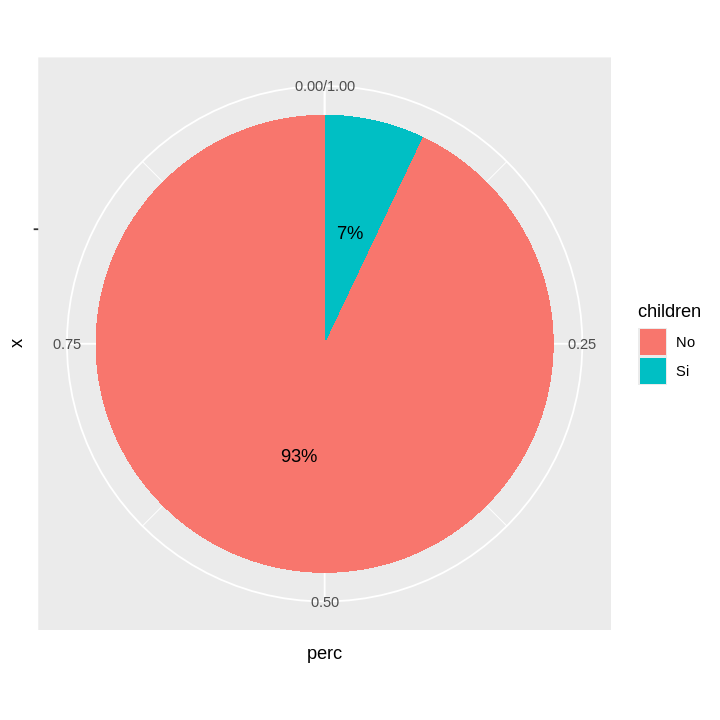

In [574]:
meninas <- hotel_csv %>%
  group_by(children)

meninas$children <- ifelse(meninas$children >= 1, "Si", "No")

df <- meninas %>%
      group_by(children) %>%
       count() %>%
       ungroup() %>%
       mutate(perc = `n` / sum(`n`)) %>%
       arrange(perc) %>%
       mutate(labels = scales::percent(perc))


ggplot(df, aes(x = "", y = perc, fill = children)) +
  geom_col() +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y")

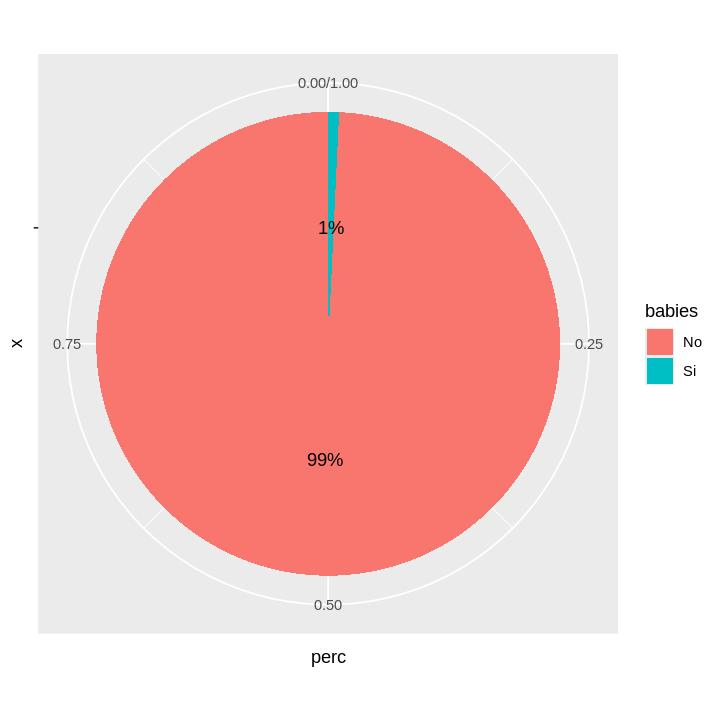

In [575]:
meninas <- hotel_csv %>%
  group_by(babies)

meninas$babies <- ifelse(meninas$babies >= 1, "Si", "No")

df <- meninas %>%
  group_by(babies) %>%
  count() %>%
  ungroup() %>%
  mutate(perc = `n` / sum(`n`)) %>%
  arrange(perc) %>%
  mutate(labels = scales::percent(perc))


ggplot(df, aes(x = "", y = perc, fill = babies)) +
  geom_col() +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y")

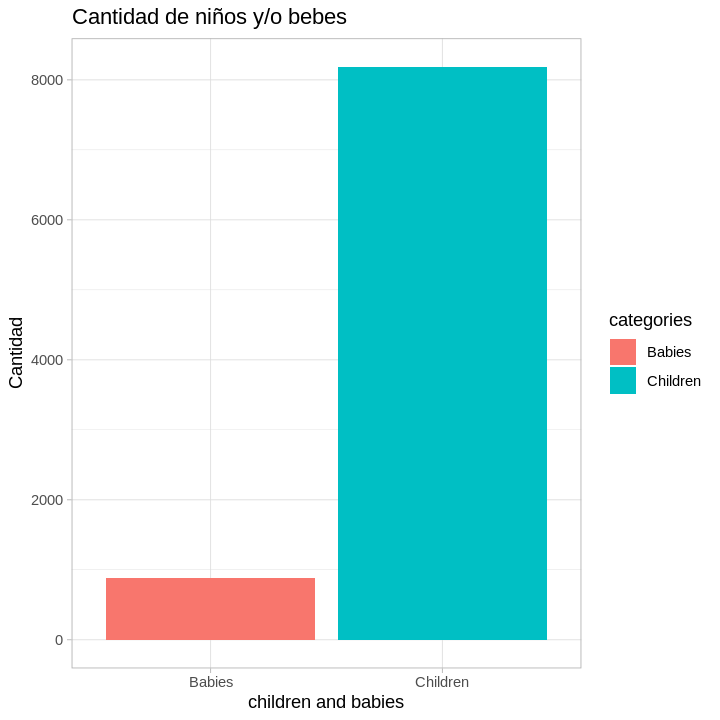

In [576]:
categories <- c('Children', 'Babies')
values <- c(cantidad_ninos, cantidad_bebes)
data <- data.frame(categories, values)

ggplot(data, aes(x = categories, y = values, fill=categories)) +
  geom_bar(stat = "identity") +
  labs(x = "children and babies", y = "Cantidad", title = "Cantidad de niños y/o bebes") +
  theme_light()

#### 5. ¿Es importante contar con espacios de estacionamiento?

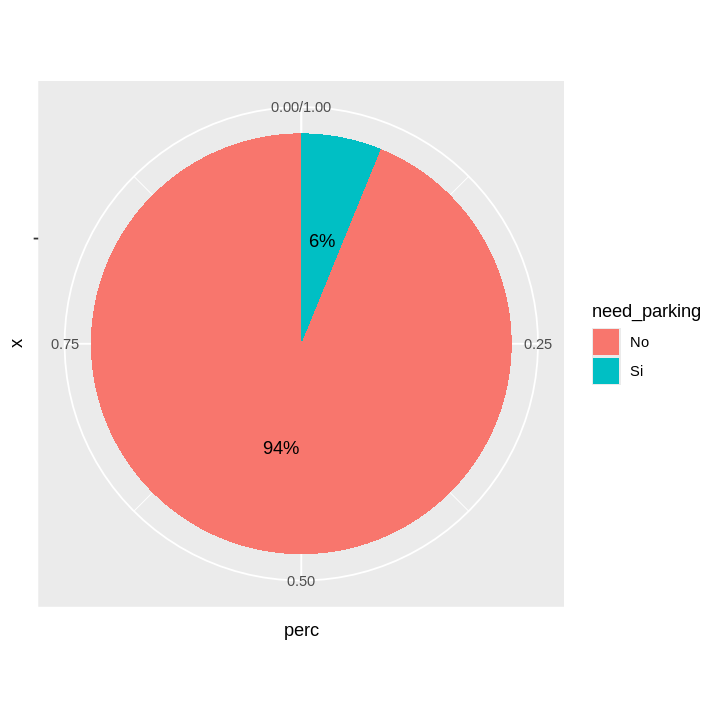

In [577]:
park_space <- hotel_csv %>%
  group_by(required_car_parking_spaces)

park_space <- park_space %>%
  rename(need_parking = required_car_parking_spaces)


park_space$need_parking <- ifelse(park_space$need_parking == 1, "Si", "No")


df <- park_space %>%
      group_by(need_parking) %>%
       count() %>%
       ungroup() %>%
       mutate(perc = `n` / sum(`n`)) %>%
       arrange(perc) %>%
       mutate(labels = scales::percent(perc))


ggplot(df, aes(x = "", y = perc, fill = need_parking)) +
  geom_col() +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y")

In [578]:
temp%>%count(required_car_parking_spaces)

required_car_parking_spaces,n
<int>,<int>
0,108716
1,7152
2,28
3,3


In [579]:
need_parking = temp%>% filter(required_car_parking_spaces!=0 & !is_canceled)
parking_income = sum((need_parking$stays_in_week_nights + need_parking$stays_in_weekend_nights) * need_parking$adr)
parking_income

[1] 2627209

In [580]:
total_income = sum((temp$stays_in_week_nights  + temp$stays_in_weekend_nights) * temp$adr)
total_income

[1] 39897095

In [581]:
cat("Procentaje de ingresos de estacionamientos : ",  parking_income / total_income * 100, "%")

Procentaje de ingresos de estacionamientos :  6.584964 %

###### Conclusiones

A traves de los procesos implementados. Podemos concluir que los ingresos generados por clientes que necesiten estacionamiento no superan los 6.6% de ingresos totales.
Por lo tanto, los estacionamientos no son importantes en la franquicia.
  

#### 6. ¿De dónde viene la mayor parte de huespedes?




tibble [175 × 2] (S3: tbl_df/tbl/data.frame)
 $ country: Factor w/ 177 levels "ABW","AGO","AIA",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ size   : num [1:175] 2 150 1 10 2 7 160 6 1 2 ...


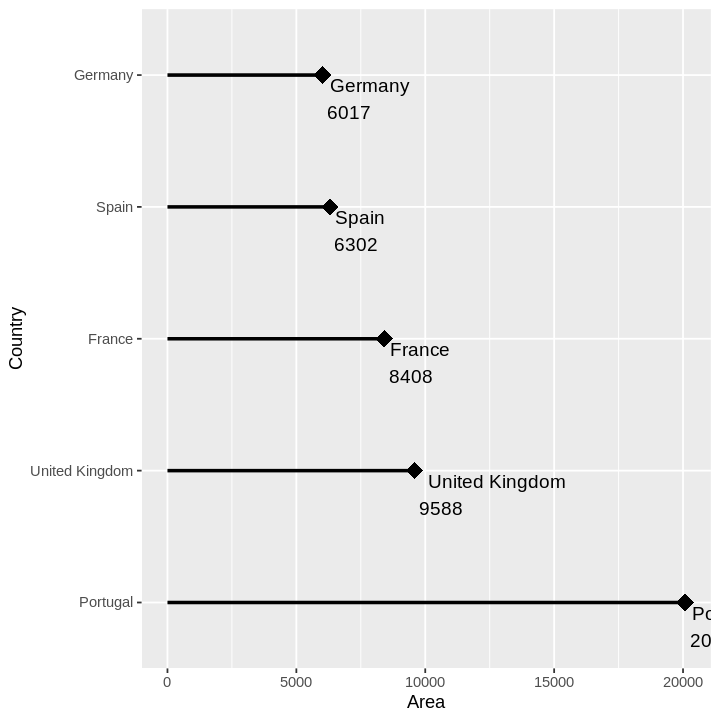

In [582]:
reservas_agrupadas <- temp %>%
  group_by(country) %>%
  summarise(size = sum(ifelse(is_canceled, 0, 1)))

str(reservas_agrupadas)
reservas_agrupadas <- as.data.frame(reservas_agrupadas)
reservas_agrupadas$country <- countrycode(reservas_agrupadas$country, "iso3c", "country.name")


reservas_top5 <- reservas_agrupadas[order(-reservas_agrupadas$size)[1:5], ]  # Filter top 5 by size


ggplot(reservas_top5, aes(x = country, y = size, fill = country)) +
  geom_segment(aes(x = reorder(country, -size), y = 0, xend = country, yend = size), linewidth = 1, linetype = 1) +  # Lollipop stems
  geom_point(aes(size = 5), shape = 18, fill = "white") +  # Lollipop circles
  geom_text(aes(label = paste(country, "\n", size, sep = "")), hjust = -0.1, vjust = 1.1, size = 4) +  # Labels with newline
  scale_x_discrete(expand = c(0.1, 0.1)) +  # Adjust axis padding for better readability
  theme(legend.position = "none") + coord_flip() +
  labs(x = "Country", y = "Area")  # Add axis labels for clarity

#### 7. ¿En qué meses del año se producen más cancelaciones de reservas?


In [583]:
pregunta7 <- temp %>%
  group_by(hotel, arrival_date_month) %>%
  summarise(is_canceled = sum(is_canceled==TRUE))

pregunta7 <- pregunta7[order(-pregunta7$is_canceled), ]  # Filter top 5 by size

`summarise()` has grouped output by 'hotel'. You can override using the
`.groups` argument.


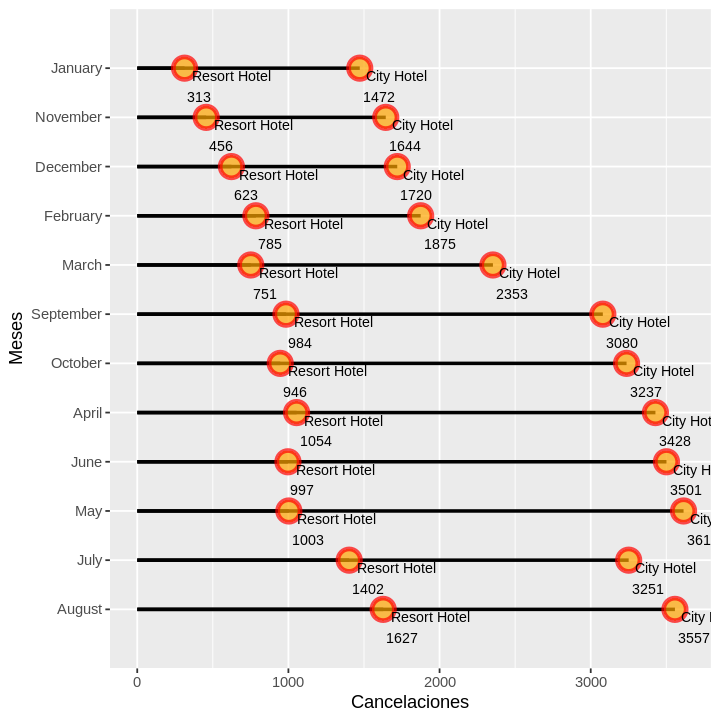

In [584]:
ggplot(pregunta7, aes(x = arrival_date_month, y = is_canceled, fill = hotel)) +
  geom_segment(aes(x = reorder(arrival_date_month, -is_canceled), y = 0, xend = arrival_date_month, yend = is_canceled), linewidth = 1, linetype = 1) +  # Lollipop stems
  geom_point( size=5, color="red", fill=alpha("orange", 0.3), alpha=0.7, shape=21, stroke=2) +
  geom_text(aes(label = paste(hotel, "\n", is_canceled, sep = "")), hjust = -0.1, vjust = 1.1, size = 3) +  # Labels with newline
  scale_x_discrete(expand = c(0.1, 0.1)) +  # Adjust axis padding for better readability
  theme(legend.position = "none") + coord_flip() +
  labs(x = "Meses", y = "Cancelaciones")  # Add axis labels for clarity

#### 8. ¿Cuánto tiempo permanecen los inquilinos en los hoteles?

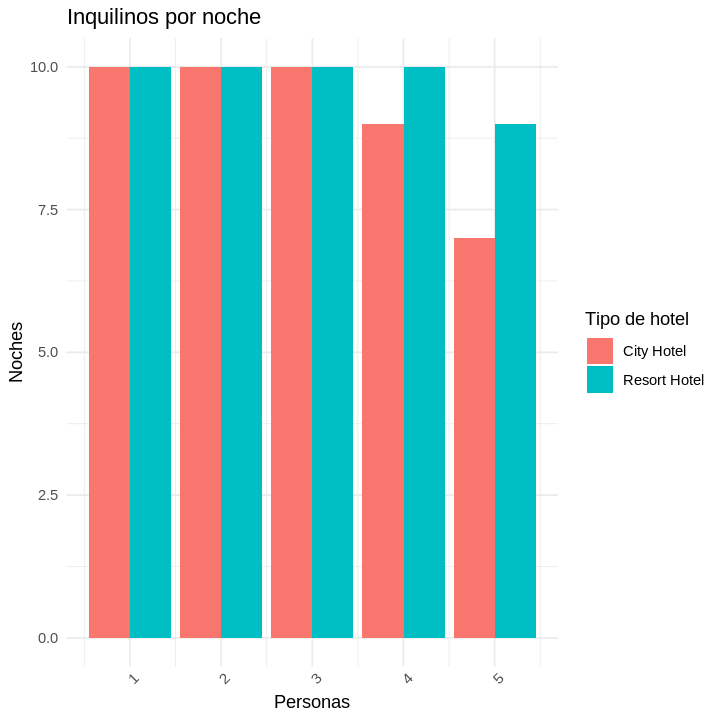

In [585]:
datos_reservas_no_canceladas <- temp %>%
  filter(is_canceled == FALSE)

nuevo_df <- data.frame(
  Tipo_hotel = datos_reservas_no_canceladas$hotel,
  Tiempo_total_estancia = datos_reservas_no_canceladas$stays_in_week_nights + datos_reservas_no_canceladas$stays_in_weekend_nights,
  Total_personas = datos_reservas_no_canceladas$adults + datos_reservas_no_canceladas$children + datos_reservas_no_canceladas$babies
)

ggplot(nuevo_df, aes(x = Total_personas, y = Tiempo_total_estancia, fill = Tipo_hotel)) +
  geom_bar(stat = "identity", position = "dodge") + # Añadir 'position = "dodge"'
  labs(title = "Inquilinos por noche",
       x = "Personas",
       y = "Noches",
       fill = "Tipo de hotel") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45))

#### 9. Cual es el mes mas demandado

`summarise()` has grouped output by 'hotel'. You can override using the
`.groups` argument.


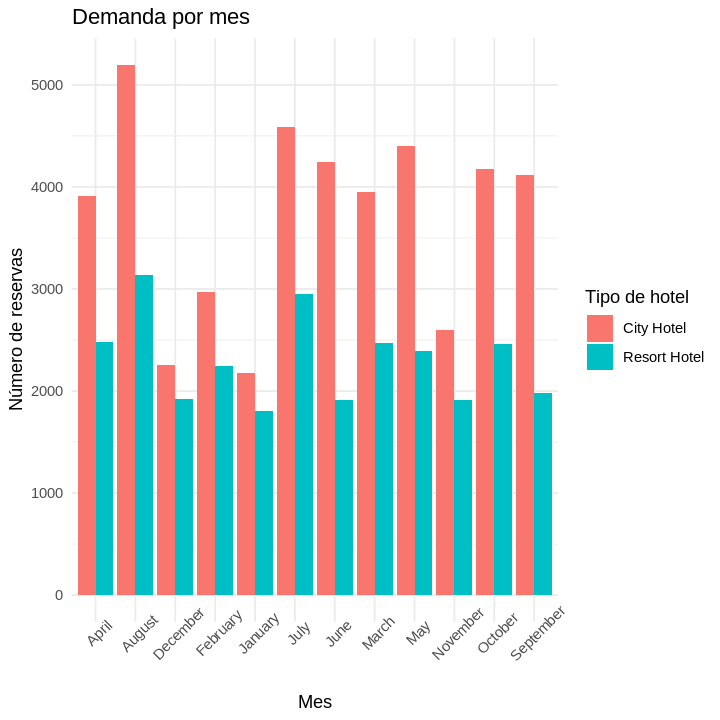

In [587]:
datos_preg1 <- temp %>%
  group_by(hotel, arrival_date_month) %>%
  summarise(is_canceled = sum(is_canceled==FALSE))

ggplot(datos_preg1, aes(x = arrival_date_month, y = is_canceled, fill = hotel)) +
  geom_bar(stat = "identity", position = "dodge") + # Añadir 'position = "dodge"'
  labs(title = "Demanda por mes",
       x = "Mes",
       y = "Número de reservas",
       fill = "Tipo de hotel") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45))

#### 10. ¿Cuándo se producen las temporadas de reservas: alta, media y baja?

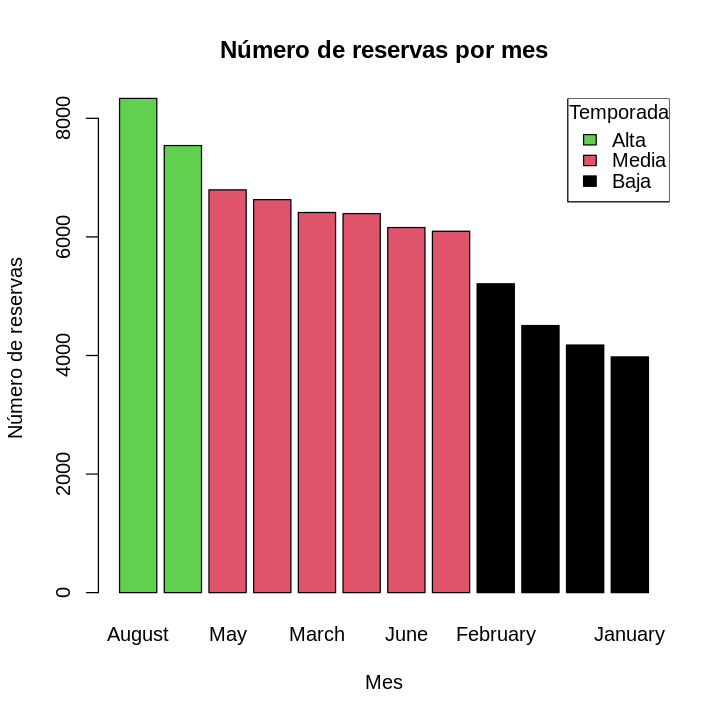

In [588]:

# Calcular el número total de reservas por mes
reservas_por_mes <- aggregate(is_canceled ~ arrival_date_month, data = hotel_csv, FUN = function(x) sum(x == 0))

# Ordenar los meses según el número de reservas (de mayor a menor)
reservas_ordenadas <- reservas_por_mes[order(reservas_por_mes$is_canceled, decreasing = TRUE), ]

# Definir las categorías de temporadas
reservas_ordenadas$temporada <- cut(reservas_ordenadas$is_canceled, breaks = 3, labels = c("Alta", "Media", "Baja"))

# Graficar el número de reservas por mes y temporada
barplot(reservas_ordenadas$is_canceled, names.arg = reservas_ordenadas$arrival_date_month,
        xlab = "Mes", ylab = "Número de reservas",
        main = "Número de reservas por mes", col = reservas_ordenadas$temporada)
legend("topright", legend = levels(reservas_ordenadas$temporada), fill = unique(reservas_ordenadas$temporada), title = "Temporada")

In [589]:
a = temp%>%filter(required_car_parking_spaces==0)

In [590]:
sum((a$stays_in_week_nights + a$stays_in_weekend_nights) * a$adr)

[1] 37269885